In [1]:
import data_utils

folder_path = 'Datasets/hair-seg.v6i.coco-segmentation/train'

hair_dataset = data_utils.HairDataset(folder_path, training_mode=True)

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


In [2]:
image, target = hair_dataset[1]

print(image)
print(target)
print(target['masks'].shape)

[<class 'torch.Tensor'>, <class 'torch.Tensor'>, <class 'torch.Tensor'>, <class 'torch.Tensor'>, <class 'torch.Tensor'>, <class 'torch.Tensor'>]
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]], device='cuda:0')
{'area': tensor([12976.9570], device='cuda:0'), 'ima

In [3]:
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor

num_classes = 2

model = torchvision.models.detection.maskrcnn_resnet50_fpn(weights="DEFAULT")

in_features = model.roi_heads.box_predictor.cls_score.in_features

model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels

hidden_layer_size = 256

model.roi_heads.mask_predictor = MaskRCNNPredictor(
    in_features_mask,
    hidden_layer_size,
    num_classes
)

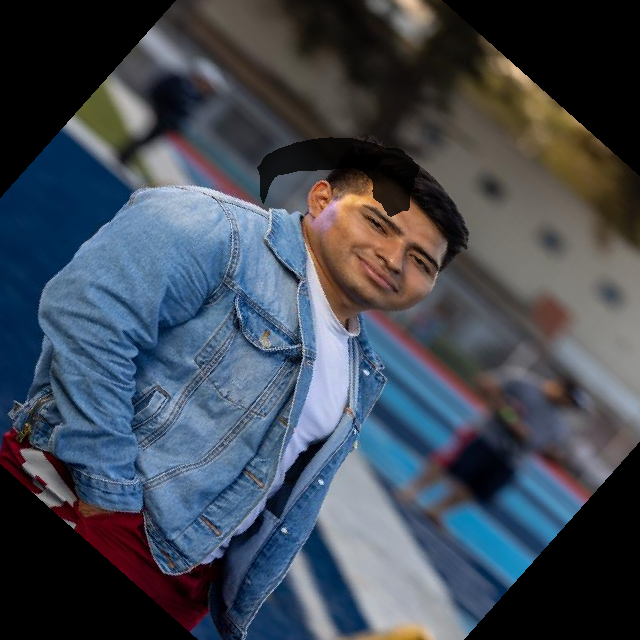

In [4]:
from visual_utils import DrawMasks
from torchvision.models.detection import MaskRCNN_ResNet50_FPN_Weights



visualiser = DrawMasks(model, MaskRCNN_ResNet50_FPN_Weights.DEFAULT.transforms(), 'cuda')

visualiser.draw_masks_from_tensor_and_masks(image, target['masks'])

In [ ]:
from torch.utils.data import DataLoader

hair_dataloader = DataLoader(
    hair_dataset,
    batch_size = 2,
    collate_fn=lambda batch: tuple(zip(*batch))
)

images, targets = next(iter(hair_dataloader))

In [ ]:
model.eval()

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

model.to(device)

predictions = model(images)

In [ ]:
predictions

In [ ]:
dave_image_path = "Datasets/test/dave_before.webp"

image = visualiser.draw_mask_from_image_path_and_model(dave_image_path)

image

In [ ]:
import torch

from training_loop import train

model.to(device)

#train(model, hair_dataloader, epochs=1)

In [ ]:
state_dict = torch.load('My Model.pt')

model.load_state_dict(state_dict)

In [ ]:
dave_image_path = "Datasets/test/dave_after.webp"

my_picture = "Datasets/test/photo.jpg"

image = visualiser.draw_mask_from_image_path_and_model(dave_image_path, prob_threshold=0.7)

image

In [ ]:
from PIL import Image

with Image.open("Datasets/test/dave_before.webp") as image:
    width, length = image.size

    max_dim = max((width, length))

    ratio = float(1000) / max_dim

    image = image.resize((int(width * ratio), int(length * ratio)))

    print(image.show(), image.size)